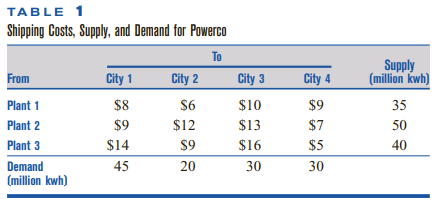

In [1]:
from pulp import *
prob = LpProblem('kWh',LpMinimize)

In [2]:
plant = ['plant 1', 'plant 2', 'plant 3']
city = ['city 1', 'city 2', 'city 3', 'city 4']

In [3]:
supply = {'plant 1': 35,
         'plant 2': 50,
         'plant 3': 40}

demand = {'city 1': 45,
         'city 2': 20,
         'city 3': 30,
         'city 4': 30}

In [4]:
cost = {'plant 1':{'city 1': 8, 'city 2': 6, 'city 3':10, 'city 4': 9},
       'plant 2':{'city 1': 9, 'city 2': 12, 'city 3':13, 'city 4': 7},
       'plant 3':{'city 1': 14, 'city 2': 9, 'city 3':16, 'city 4': 5}}

In [5]:
rute = [(i, j) for i in plant for j in city]

In [6]:
var = LpVariable.dicts('kWh ditransfer dari', (plant,city), 0, cat=LpInteger)

#Fungsi Objektif
prob += lpSum(var[i][j]*cost[i][j] for (i,j) in rute)

#Fungsi Kendala
for j in city:
    prob += lpSum(var[i][j] for i in plant) == demand[j]
    
for i in plant:
    prob += lpSum(var[i][j] for j in city) == supply[i]

In [7]:
prob.solve()

1

In [8]:
print("status:", LpStatus[prob.status])

status: Optimal


In [9]:
for v in prob.variables():
    if v.varValue > 0:
        print(v.name, '=', v.varValue)

kWh_ditransfer_dari_plant_1_city_2 = 10
kWh_ditransfer_dari_plant_1_city_3 = 25
kWh_ditransfer_dari_plant_2_city_1 = 45
kWh_ditransfer_dari_plant_2_city_3 = 5
kWh_ditransfer_dari_plant_3_city_2 = 10
kWh_ditransfer_dari_plant_3_city_4 = 30


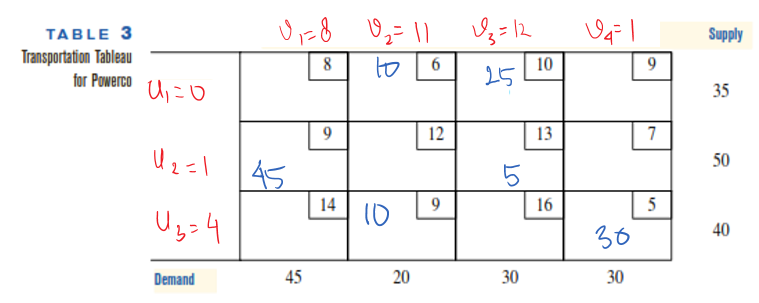

In [10]:
print("Minimum cost: ", value(prob.objective))

Minimum cost:  1020


In [11]:
10*6+25*10+45*9+5*13+10*9+30*5

1020

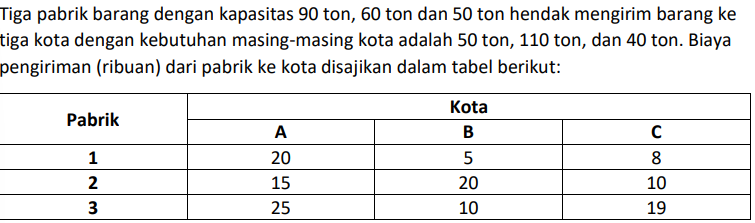

In [12]:
pabrik = ['1', '2', '3']
kota = ['A', 'B', 'C']

In [13]:
supply = {'1': 90,
         '2': 60,
         '3': 50}

demand ={'A': 50,
        'B': 110,
        'C': 40}

In [14]:
harga = {'1':{'A':20 , 'B': 5,  'C': 8 },
         '2':{'A':15 , 'B': 20, 'C': 10},
         '3':{'A':25 , 'B': 10, 'C': 19}}

In [15]:
rute = [(m, n) for m in pabrik for n in kota]

In [16]:
prob1 = LpProblem('Pabrik',LpMinimize)

In [17]:
var1 = LpVariable.dicts('Barang dari pabrik', (pabrik, kota), 0, 
                        cat=LpInteger)

In [18]:
#Fungsi Objektif

prob1 += lpSum(var1[m][n]*harga[m][n] for (m,n) in rute)

#Fungsi Kendala
for n in kota:
    prob1 += lpSum(var1[m][n] for m in pabrik) == demand[n]
    
for m in pabrik:
    prob1 += lpSum(var1[m][n] for n in kota) == supply[m]

In [19]:
prob1.solve()

1

In [20]:
print("status:", LpStatus[prob1.status])

status: Optimal


In [21]:
for k in prob1.variables():
    if k.varValue > 0:
        print(k.name, '=', k.varValue)

Barang_dari_pabrik_1_B = 60
Barang_dari_pabrik_1_C = 30
Barang_dari_pabrik_2_A = 50
Barang_dari_pabrik_2_C = 10
Barang_dari_pabrik_3_B = 50


In [22]:
print("Minimum cost: ", value(prob1.objective))

Minimum cost:  1890


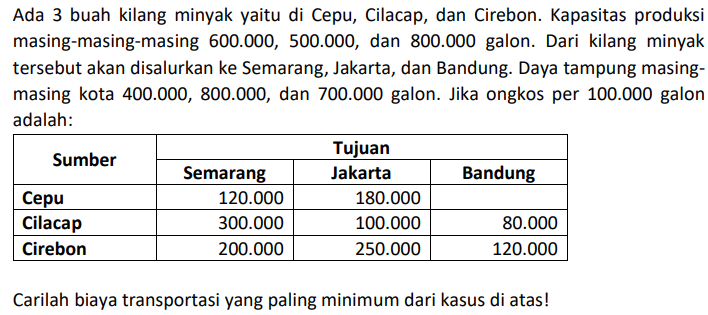

In [23]:
sumber = ['Cepu', 'Cilacap', 'Cirebon']
tujuan = ['Semarang', 'Jakarta', 'Bandung']

In [24]:
supply1 = {'Cepu': 600,
         'Cilacap': 500,
         'Cirebon': 800}

demand1 ={'Semarang': 400,
        'Jakarta': 800,
        'Bandung': 700}

In [25]:
harga1 = {'Cepu':{'Semarang':120 , 'Jakarta': 180, 'Bandung': 0},
          'Cilacap':{'Semarang':300 , 'Jakarta': 100,  'Bandung': 80 },
          'Cirebon':{'Semarang':200 , 'Jakarta': 250,  'Bandung': 120 }
        }

In [26]:
rute1= [(m, n) for m in sumber for n in tujuan]

In [27]:
prob2 = LpProblem('Pabrik',LpMinimize)

In [28]:
var2 = LpVariable.dicts('Minyak dari sumber', (sumber, tujuan), 0, 
                        cat=LpInteger)

In [29]:
#Fungsi Objektif

prob2 += lpSum(var2[m][n]*harga1[m][n] for (m,n) in rute1)

#Fungsi Kendala
for n in tujuan:
    prob2 += lpSum(var2[m][n] for m in sumber) == demand1[n]
    
for m in sumber:
    prob2 += lpSum(var2[m][n] for n in tujuan) == supply1[m]

In [30]:
prob2.solve()

1

In [31]:
for k in prob2.variables():
    if k.varValue > 0:
        print(k.name, '=', k.varValue)

Minyak_dari_sumber_Cepu_Bandung = 600
Minyak_dari_sumber_Cilacap_Jakarta = 500
Minyak_dari_sumber_Cirebon_Bandung = 100
Minyak_dari_sumber_Cirebon_Jakarta = 300
Minyak_dari_sumber_Cirebon_Semarang = 400


In [32]:
print("Minimum cost: ", value(prob2.objective))

Minimum cost:  217000
